In [5]:
!pip install -r ../requirements.txt

  Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
  Using cached pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl (10.7 MB)
  Using cached scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
  Using cached matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl (23.1 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl (250 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.54.1-cp311-cp311-macosx_11_0_arm64.whl (2.3 MB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl (64 kB)
  Using cached p

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression

# Load the data
df = pd.read_csv('../data/train.csv')

# Display basic information about the dataset
print(df.info())

# Show summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

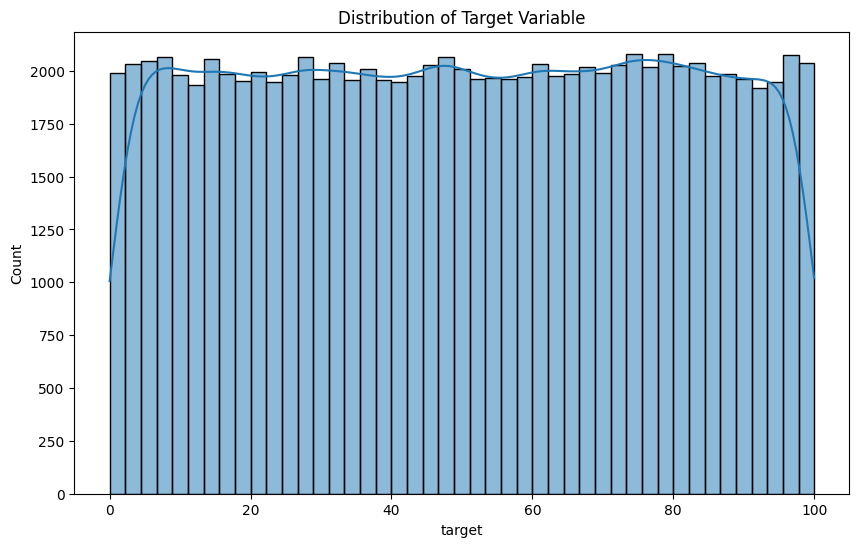

In [8]:

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.show()

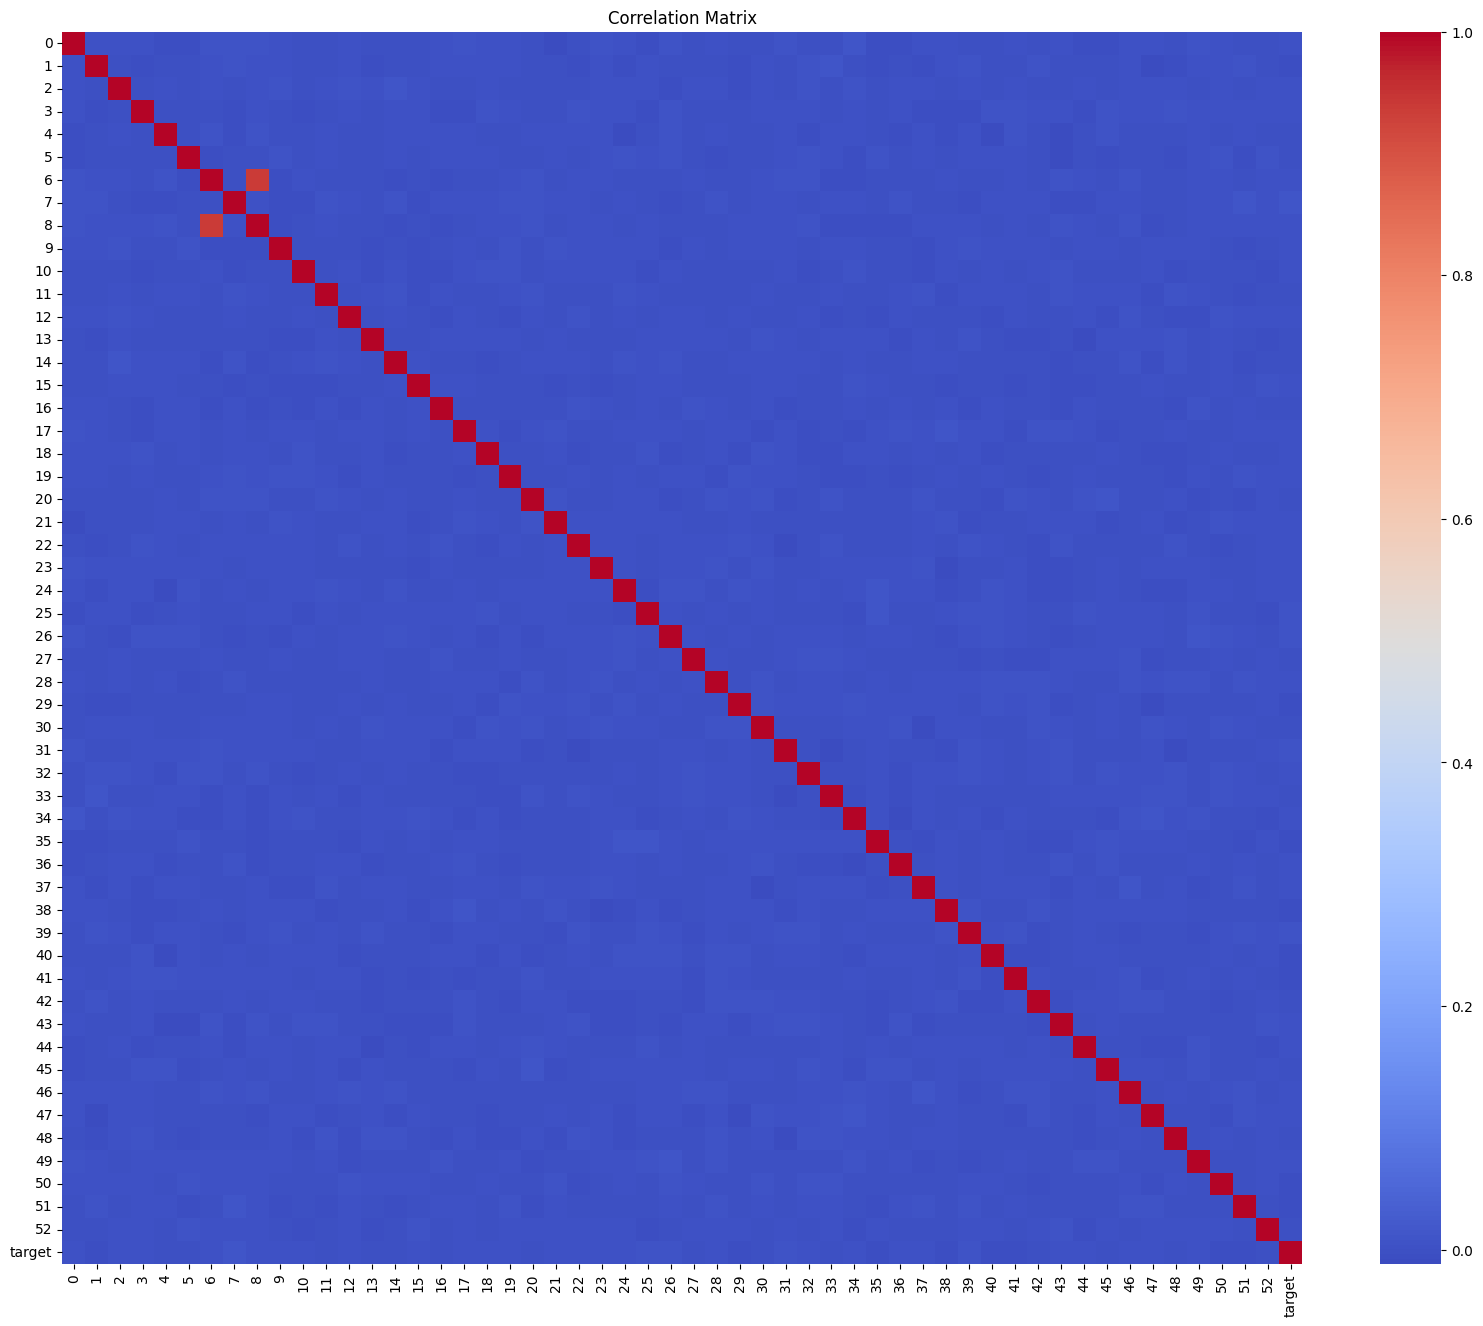

In [9]:

# Plot correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

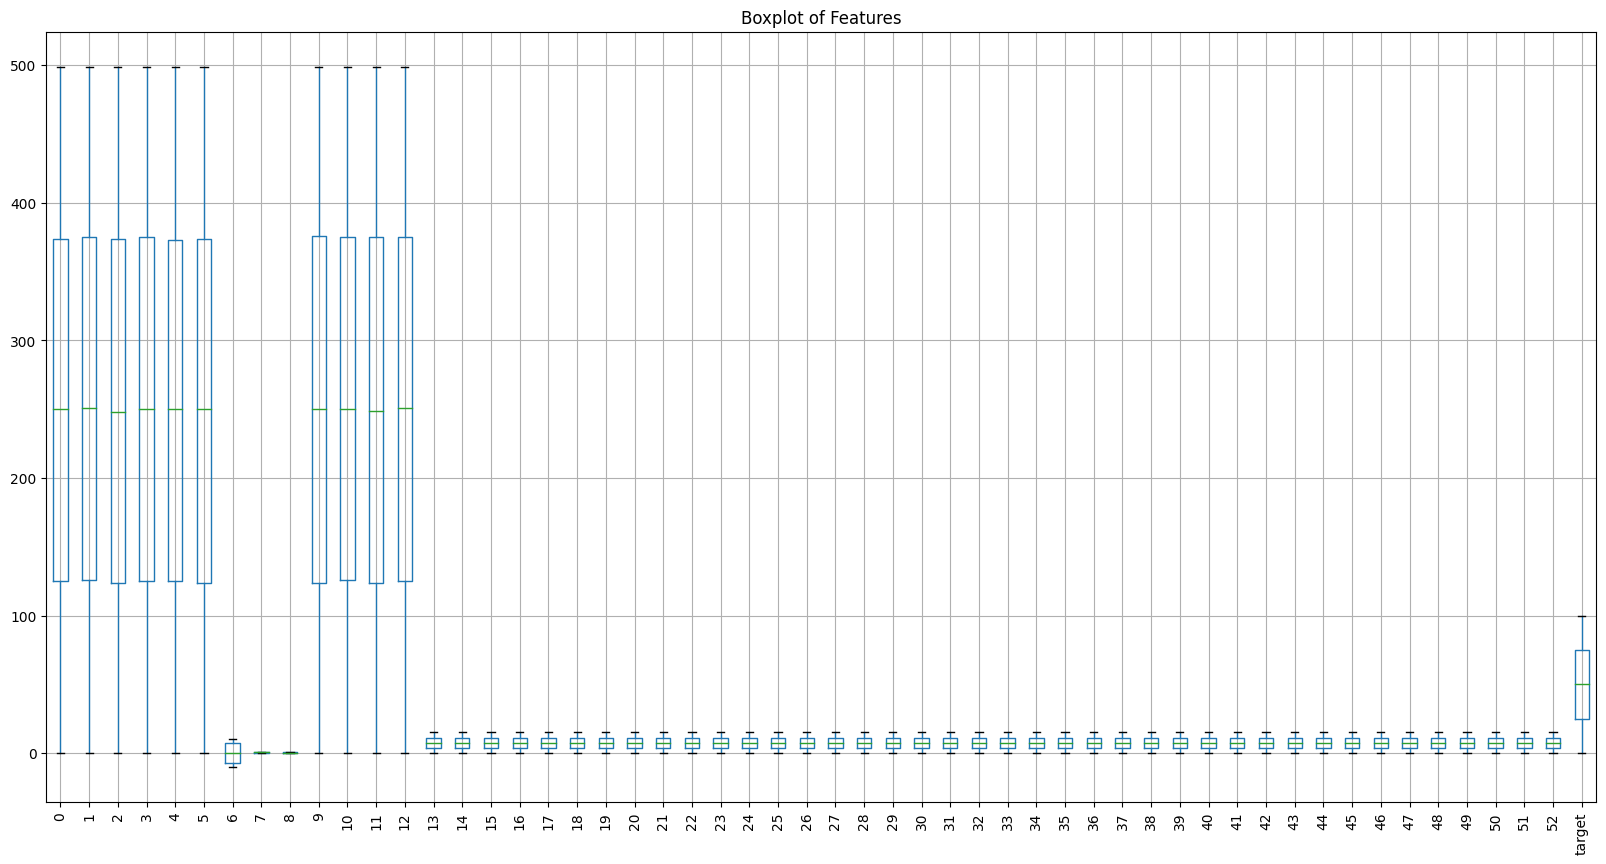

In [10]:

# Check for outliers
plt.figure(figsize=(20, 10))
df.boxplot(figsize=(20, 10))
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

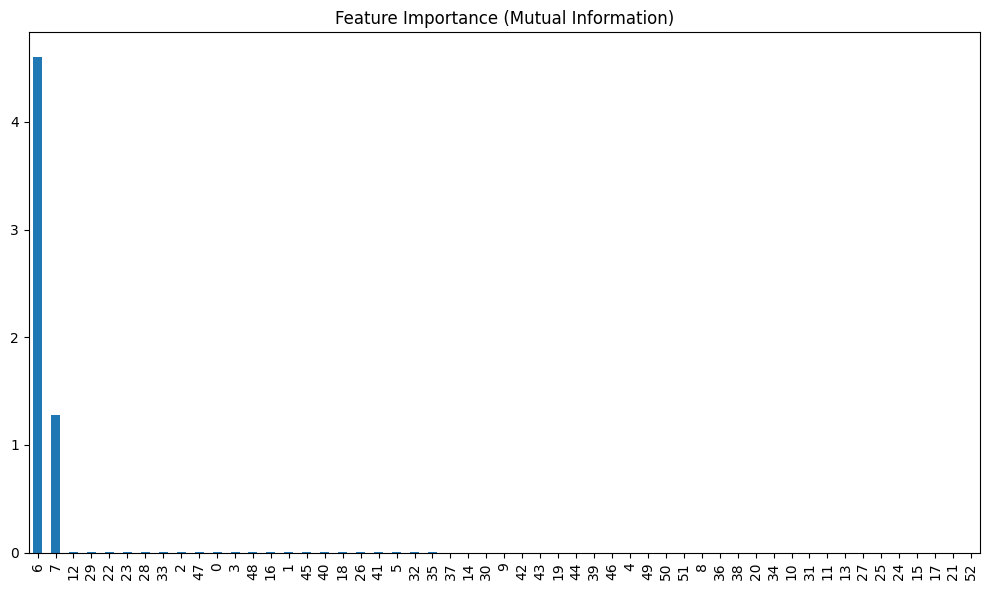

In [11]:
# Feature importance using mutual information
X = df.drop('target', axis=1)
y = df['target']
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
mi_scores.plot.bar()
plt.title('Feature Importance (Mutual Information)')
plt.tight_layout()
plt.show()

In [12]:
# Model comparison
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} - Mean RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")

Linear Regression - Mean RMSE: 28.8866 (+/- 0.0506)
Lasso - Mean RMSE: 28.8709 (+/- 0.0479)
Ridge - Mean RMSE: 28.8866 (+/- 0.0506)
Random Forest - Mean RMSE: 0.0049 (+/- 0.0001)
